In [1]:
from LOTUS_regression.regression import mzm_regression
from LOTUS_regression.predictors import load_data
from LOTUS_regression.predictors.seasonal import add_seasonal_components
import LOTUS_regression.tests as tests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from scipy import stats

In [2]:
uccle =   pd.read_csv('/Volumes/HD3/KMI/MLR_Uccle/Files/1km_monthlymean_all.csv')

uccle['date'] =  pd.to_datetime(uccle['date'], format='%Y-%m')
uccle.set_index('date', inplace=True)
uccle[0:5]

,0km,1km,2km,3km,4km,5km,6km,7km,8km,9km,...,26km_ds,27km_ds,28km_ds,29km_ds,30km_ds,31km_ds,32km_ds,33km_ds,34km_ds,35km_ds
date,,,,,,,,,,,,,,,,,,,,,
1969-01-01,2.912,2.989,3.170,3.050,2.810,2.582,2.356,1.948,1.794,2.618,...,1.899391,1.407957,1.148733,1.123844,1.637756,2.476000,2.678625,2.753853,2.261526,NaN
1969-02-01,2.508,1.944,1.801,1.997,2.016,1.823,2.131,2.838,4.030,5.592,...,1.437851,1.544872,1.850340,1.919000,1.519766,1.687128,1.881465,1.883462,1.704750,1.500143
1969-03-01,1.832,2.352,3.002,3.077,2.906,2.517,2.097,1.852,1.843,2.819,...,-0.071229,-0.020167,-0.296708,-0.118042,0.118042,0.292447,0.477867,0.689243,0.577750,0.911000
1969-04-01,2.000,3.164,3.738,3.569,3.055,2.574,2.121,1.859,1.617,1.599,...,0.138875,0.158833,0.284354,0.336833,0.498917,0.285667,0.205977,0.332538,0.405630,0.420824
1969-05-01,1.378,2.449,3.464,3.617,3.473,3.258,2.857,2.779,3.667,5.461,...,0.154104,0.326875,0.532583,0.592271,0.636562,0.671543,0.946175,1.012441,1.207348,0.985000


In [3]:
predictors = load_data('pred_baseline_ilt.csv')
print(list(predictors))
const_with_seasons = add_seasonal_components(predictors, {'pre_const': 4, 'post_const':4, 'gap_cons':4})


['enso', 'trop', 'solar', 'qboA', 'qboB', 'aod', 'linear_pre', 'linear_post', 'pre_const', 'post_const', 'gap_cons']


In [19]:
#uccle_time = uccle.loc['1977-02-01':'2017-06-01']
uccle_time = uccle.loc['1977-02-01':'1979-02-01']

tlist = uccle.loc['1977-02-01':'1979-02-01'].index
print(tlist)
uccle_time= uccle_time[uccle_time['5km']>0]

DatetimeIndex(['1977-02-01', '1977-03-01', '1977-04-01', '1977-05-01',
               '1977-06-01', '1977-07-01', '1977-08-01', '1977-09-01',
               '1977-10-01', '1977-11-01', '1977-12-01', '1978-01-01',
               '1978-02-01', '1978-03-01', '1978-04-01', '1978-05-01',
               '1978-06-01', '1978-07-01', '1978-08-01', '1978-09-01',
               '1978-10-01', '1978-11-01', '1978-12-01', '1979-01-01',
               '1979-02-01'],
              dtype='datetime64[ns]', name='date', freq=None)


In [13]:
const_with_seasons, uccle_time = pd.DataFrame.align(const_with_seasons, uccle_time, axis=0)

# (nsamples, npredictors) matrix
X = const_with_seasons.values
print('X', len(X))

# (nsamples) array of observations
Y = uccle_time['5km'].values
print('Y',len(Y))

regression_output = mzm_regression(X, Y)

X 485
Y 485


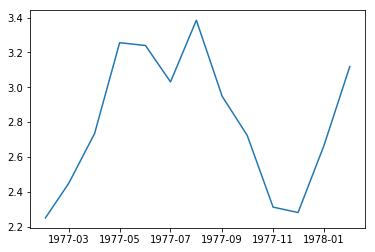

In [16]:
plt.plot(uccle_time.index, uccle_time['5km'])
#plt.plot(uccle_time.index, regression_output['fit_values'])

In [15]:
param_list = dict(zip(list(const_with_seasons), regression_output['gls_results'].params))
param_list

{'enso': -2.9563191939408426,
 'trop': -0.1058224738517406,
 'solar': 2.512303647277811,
 'qboA': -0.15447007986177574,
 'qboB': -0.044615164358815296,
 'aod': -0.4186506286871938,
 'linear_pre': -2.50081161896302,
 'linear_post': 2.1270411541343265e-14,
 'pre_const': 1.2317465090007147,
 'post_const': -3.0085381260840575e-14,
 'gap_cons': -4.6470055708607346e-15,
 'pre_const_sin0': -0.6090570626974134,
 'pre_const_cos0': -0.6389560665991136,
 'pre_const_sin1': -0.24333234634611678,
 'pre_const_cos1': 0.008888406091134282,
 'pre_const_sin2': -0.3257211995077611,
 'pre_const_cos2': -0.14863248983241872,
 'pre_const_sin3': 0.2351143861448628,
 'pre_const_cos3': 0.42919969742798436,
 'post_const_sin0': 0.0,
 'post_const_cos0': 0.0,
 'post_const_sin1': 0.0,
 'post_const_cos1': 0.0,
 'post_const_sin2': 0.0,
 'post_const_cos2': 0.0,
 'post_const_sin3': 0.0,
 'post_const_cos3': 0.0,
 'gap_cons_sin0': 0.0,
 'gap_cons_cos0': 0.0,
 'gap_cons_sin1': 0.0,
 'gap_cons_cos1': 0.0,
 'gap_cons_sin2': 0